<a href="https://colab.research.google.com/github/djsabelo/Samsung/blob/main/Data%20Wrangling%20-%20Optimizations/data_wrangling_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data for two DataFrames

In [ ]:
data1 = {'ID': [1, 2, 3, 4],
         'Name': ['Alice', 'Bob', 'Charlie', 'David']}
data2 = {'ID': [2, 3, 4, 5],
         'Age': [25, 30, 35, 40]}

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)


# Part 1: Inner Join

In [ ]:
# Inner join on 'ID' column
inner_joined = df1.set_index('ID').join(df2.set_index('ID'), how='inner')

# Display the inner joined DataFrame
print("Inner Joined DataFrame:")
print(inner_joined)



Inner Joined DataFrame:
      Name  Age
2      Bob   25
3  Charlie   30
4    David   35


# Part 2: Outer Join

In [ ]:
# Outer join on 'ID' column
outer_joined = df1.set_index('ID').join(df2.set_index('ID'), how='outer')

# Fill missing values with 0 for visualization
outer_joined.fillna(0, inplace=True)

# Display the outer joined DataFrame
print("\nOuter Joined DataFrame:")
print(outer_joined)




Outer Joined DataFrame:
       Name   Age
ID               
1     Alice   0.0
2       Bob  25.0
3   Charlie  30.0
4     David  35.0
5         0  40.0


# Create a bar plot to visualize the ages after outer join

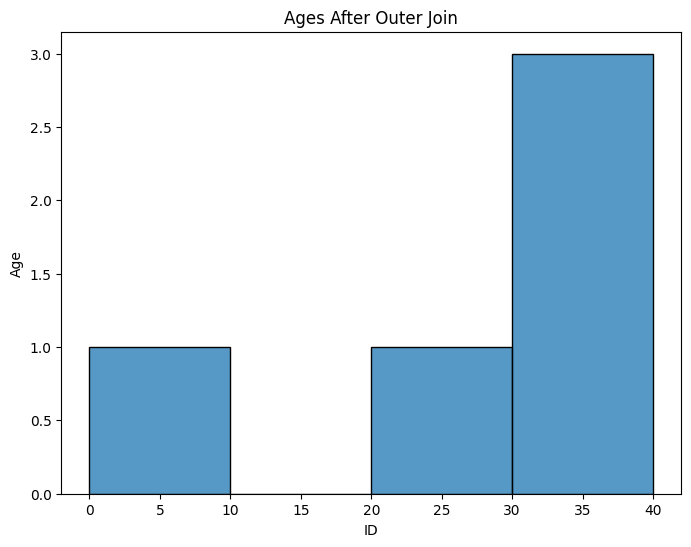

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(outer_joined['Age'])
plt.title('Ages After Outer Join')
plt.xlabel('ID')
plt.ylabel('Age')
plt.show()




Visualization of Inner Join

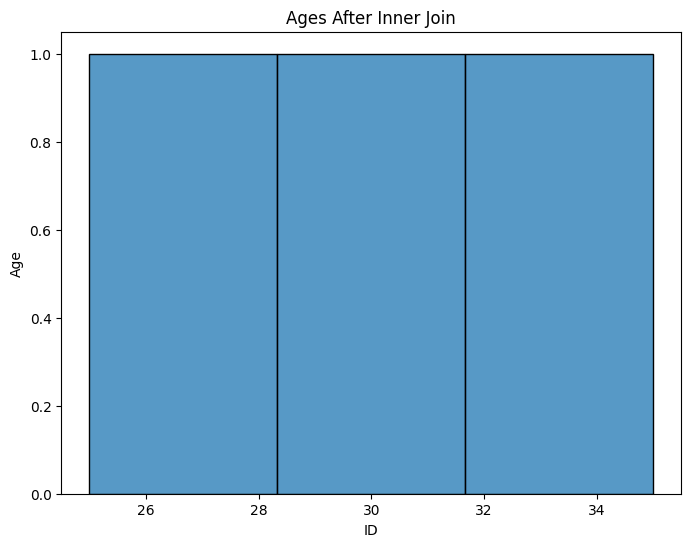

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(inner_joined['Age'])
plt.title('Ages After Inner Join')
plt.xlabel('ID')
plt.ylabel('Age')
plt.show()

# Tidy Data

In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:

# Load dataset from seaborn
base_url = "https://github.com/byuidatascience/data4python4ds/raw/master/data-raw/"
table1 = pd.read_csv("{}table1/table1.csv".format(base_url))
table2 = pd.read_csv("{}table2/table2.csv".format(base_url))
table3 = pd.read_csv("{}table3/table3.csv".format(base_url))
table4a = pd.read_csv("{}table4a/table4a.csv".format(base_url))
table4b = pd.read_csv("{}table4b/table4b.csv".format(base_url))
table5 = pd.read_csv("{}table5/table5.csv".format(base_url), dtype = 'object')

print("Epidemic cases:")
print(table1.head())
print(table2.head())
print(table3.head())
print(table4a.head())
print(table4b.head())
print(table5.head())

Epidemic cases:
       country  year   cases  population
0  Afghanistan  1999     745    19987071
1  Afghanistan  2000    2666    20595360
2       Brazil  1999   37737   172006362
3       Brazil  2000   80488   174504898
4        China  1999  212258  1272915272
       country  year        type     count
0  Afghanistan  1999       cases       745
1  Afghanistan  1999  population  19987071
2  Afghanistan  2000       cases      2666
3  Afghanistan  2000  population  20595360
4       Brazil  1999       cases     37737
       country  year               rate
0  Afghanistan  1999       745/19987071
1  Afghanistan  2000      2666/20595360
2       Brazil  1999    37737/172006362
3       Brazil  2000    80488/174504898
4        China  1999  212258/1272915272
       country    1999    2000
0  Afghanistan     745    2666
1       Brazil   37737   80488
2        China  212258  213766
       country        1999        2000
0  Afghanistan    19987071    20595360
1       Brazil   172006362   174504898

In [ ]:
table5

,country,century,year,rate
0,Afghanistan,19,99,745/19987071
1,Afghanistan,20,00,2666/20595360
2,Brazil,19,99,37737/172006362
3,Brazil,20,00,80488/174504898
4,China,19,99,212258/1272915272
5,China,20,00,213766/1280428583


These are all representations of the same underlying data, but they are not equally easy to use. One dataset, the tidy dataset, will be much easier to work with inside the tidyverse.

There are three interrelated rules which make a dataset tidy:

  - Each variable must have its own column.
  - Each observation must have its own row.
  - Each value must have its own cell.

  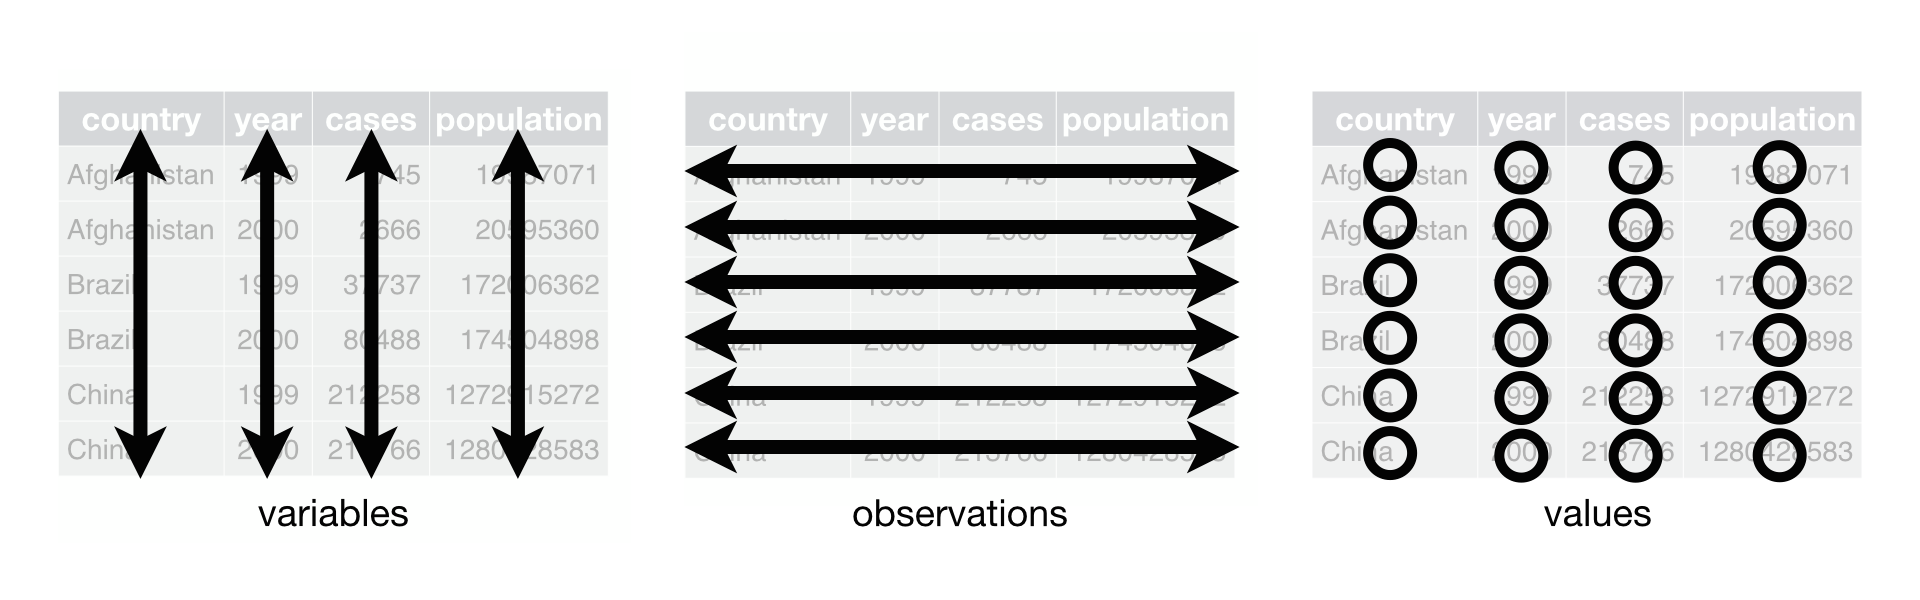

These three rules are interrelated because it’s impossible to only satisfy two of the three. That interrelationship leads to an even simpler set of practical instructions:

- Put each dataset in a tibble.
- Put each variable in a column.

In this example, only table1 is tidy. It’s the only representation where each column is a variable.

Why ensure that your data is tidy? There are two main advantages:

  - here’s a general advantage to picking one consistent way of storing data. If you have a consistent data structure, it’s easier to learn the tools that work with it because they have an underlying uniformity.

  - There’s a specific advantage to placing variables in columns because it allows pandas’ and NumPy’s vectorised nature to shine. As you learned in assign and aggregate functions, most built-in R functions work with vectors of values. That makes transforming tidy data feel particularly natural.

Altair and pandas work well with tidy data. Here are a couple of small examples showing how you might work with table1.

# Part 1: Tidy Data Operations

## Melt the dataset to convert it into tidy format

In [ ]:
table4a


,country,1999,2000
0,Afghanistan,745,2666
1,Brazil,37737,80488
2,China,212258,213766


In [ ]:

tidy4a = table4a.melt(['country'], var_name = "year", value_name = "cases")
tidy4a

,country,year,cases
0,Afghanistan,1999,745
1,Brazil,1999,37737
2,China,1999,212258
3,Afghanistan,2000,2666
4,Brazil,2000,80488
5,China,2000,213766


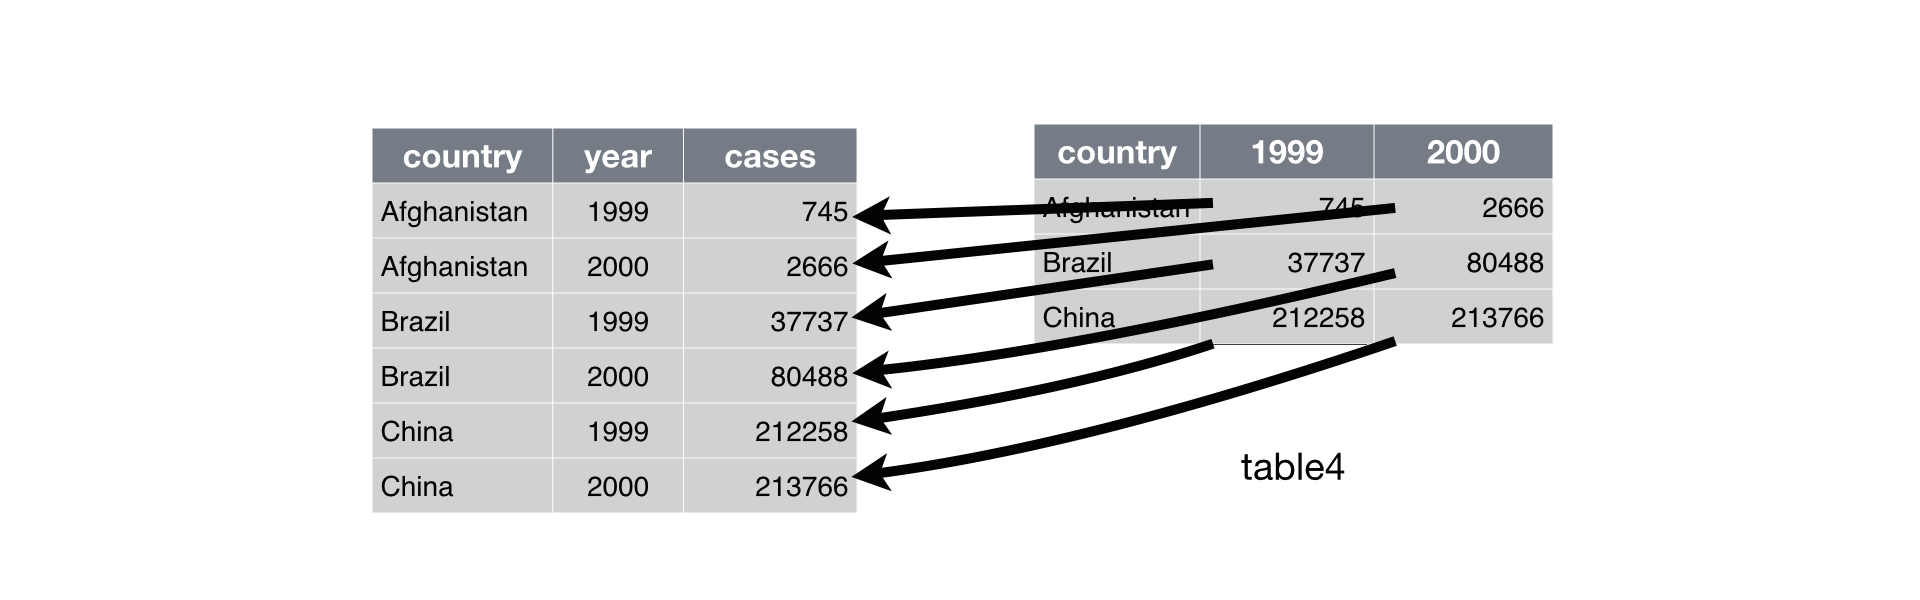

In [ ]:
table4b

tidy4a = table4a.melt(['country'], var_name = "year", value_name = "cases")
tidy4b = table4b.melt(['country'], var_name = 'year', value_name = 'population')
tidy = pd.merge(tidy4a, tidy4b, on = ['country', 'year'])

tidy

,country,year,cases,population
0,Afghanistan,1999,745,19987071
1,Brazil,1999,37737,172006362
2,China,1999,212258,1272915272
3,Afghanistan,2000,2666,20595360
4,Brazil,2000,80488,174504898
5,China,2000,213766,1280428583



## Pivot the dataframe

pivot() is the opposite of melt()

In [ ]:
table2_pivot = table2.pivot_table(
    index = ['country', 'year'],
    columns = 'type',
    values = 'count').reset_index()
print("Before Pivot")
print(table2)
print("\n After Pivot")
print(table2_pivot)

Before Pivot
        country  year        type       count
0   Afghanistan  1999       cases         745
1   Afghanistan  1999  population    19987071
2   Afghanistan  2000       cases        2666
3   Afghanistan  2000  population    20595360
4        Brazil  1999       cases       37737
5        Brazil  1999  population   172006362
6        Brazil  2000       cases       80488
7        Brazil  2000  population   174504898
8         China  1999       cases      212258
9         China  1999  population  1272915272
10        China  2000       cases      213766
11        China  2000  population  1280428583

 After Pivot
type      country  year   cases  population
0     Afghanistan  1999     745    19987071
1     Afghanistan  2000    2666    20595360
2          Brazil  1999   37737   172006362
3          Brazil  2000   80488   174504898
4           China  1999  212258  1272915272
5           China  2000  213766  1280428583


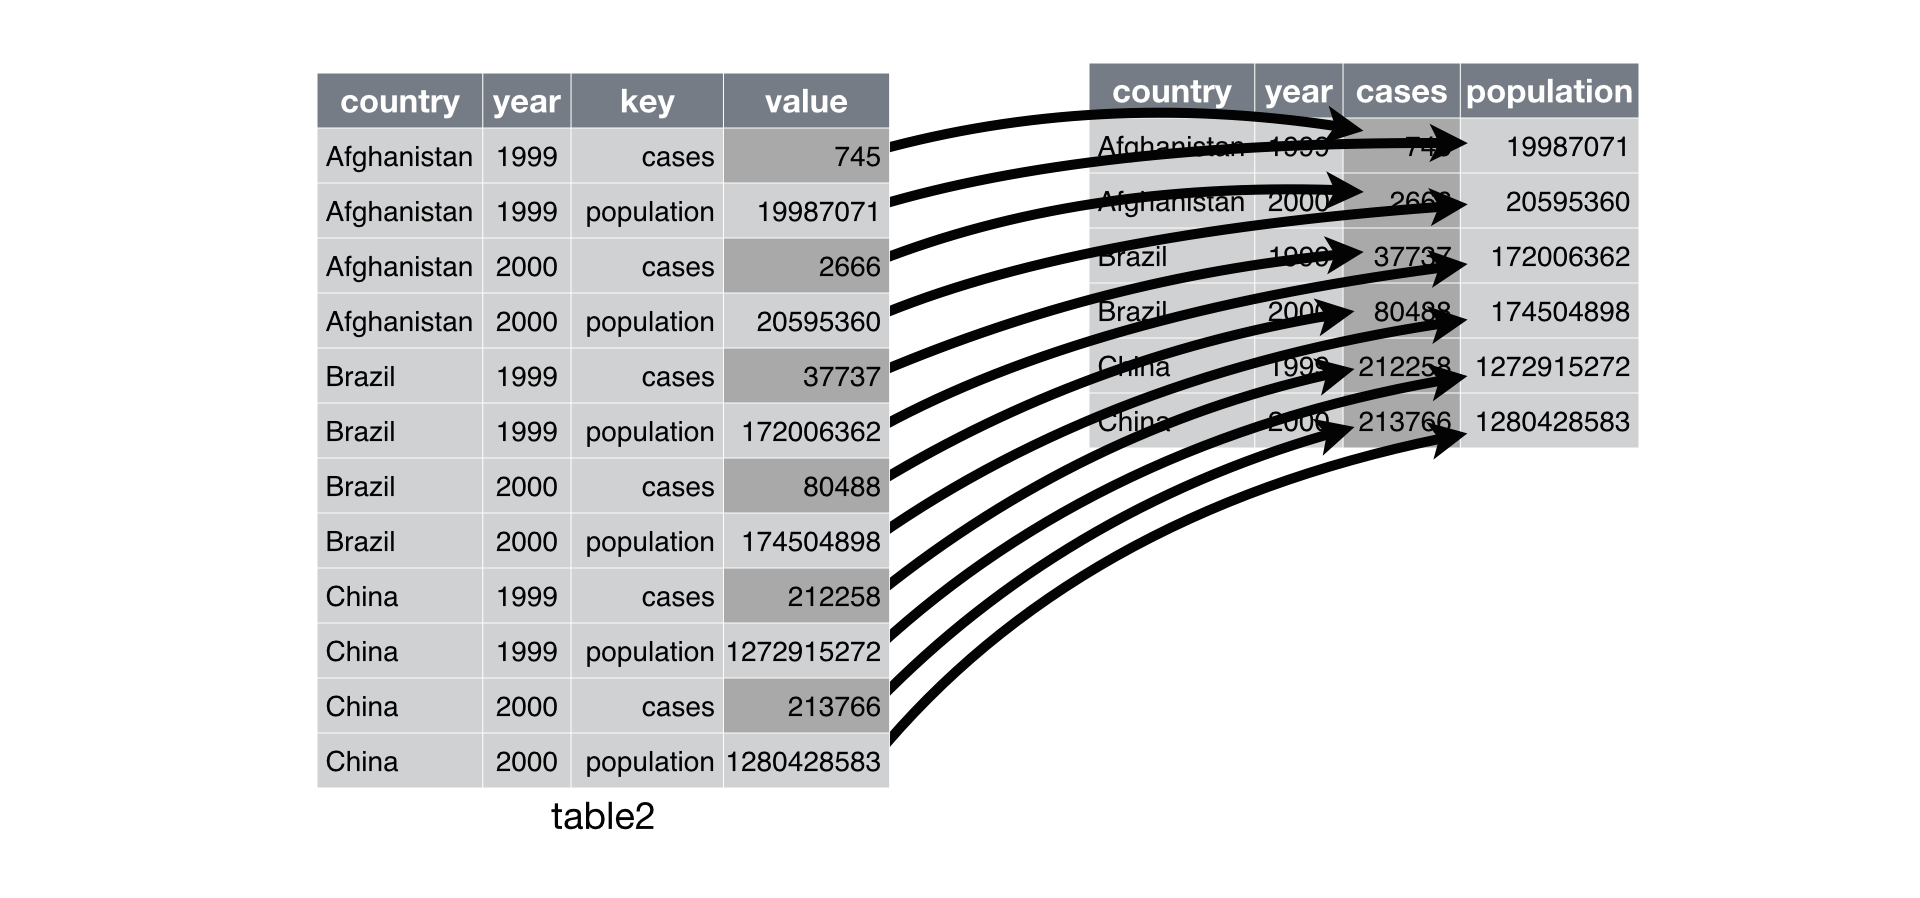

# Split

In [ ]:
table3


,country,year,rate
0,Afghanistan,1999,745/19987071
1,Afghanistan,2000,2666/20595360
2,Brazil,1999,37737/172006362
3,Brazil,2000,80488/174504898
4,China,1999,212258/1272915272
5,China,2000,213766/1280428583


In [ ]:
new_columns = (table3.
  rate.str.split("/", expand = True).
  rename(columns = {0: "cases", 1: "population"})
  )


concat_table = pd.concat([table3.drop(columns = 'rate'), new_columns], axis = 1)
print(concat_table)

       country  year   cases  population
0  Afghanistan  1999     745    19987071
1  Afghanistan  2000    2666    20595360
2       Brazil  1999   37737   172006362
3       Brazil  2000   80488   174504898
4        China  1999  212258  1272915272
5        China  2000  213766  1280428583


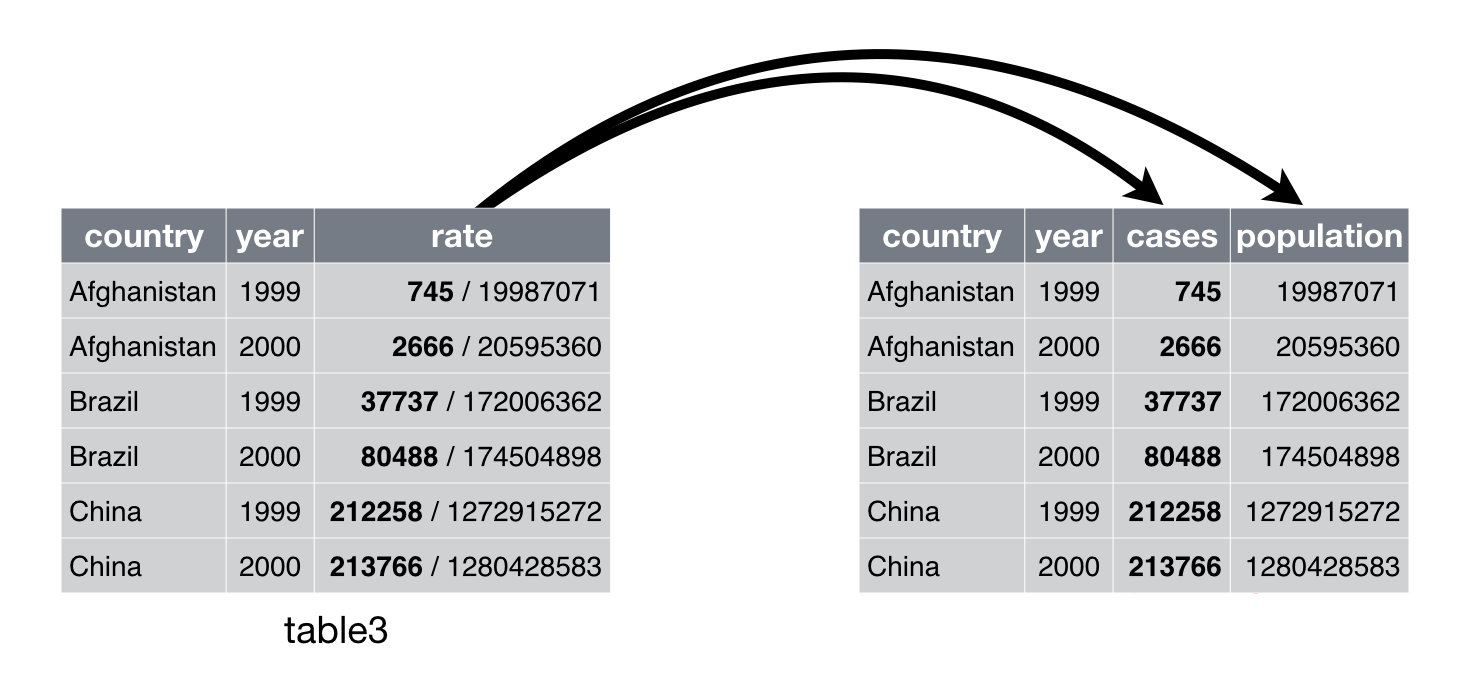

# Unite

In [ ]:
table3

,country,year,rate
0,Afghanistan,1999,745/19987071
1,Afghanistan,2000,2666/20595360
2,Brazil,1999,37737/172006362
3,Brazil,2000,80488/174504898
4,China,1999,212258/1272915272
5,China,2000,213766/1280428583


In [ ]:
table5

,country,century,year,rate
0,Afghanistan,19,99,745/19987071
1,Afghanistan,20,00,2666/20595360
2,Brazil,19,99,37737/172006362
3,Brazil,20,00,80488/174504898
4,China,19,99,212258/1272915272
5,China,20,00,213766/1280428583


In [ ]:
#cent_year = pd.DataFrame({
#    'century': table3.year.astype(str).str[:2],
#    'year': table3.year.astype(str).str[-2:]
#})

#pd.concat([table3.drop(columns = 'year'), cent_year], axis = 1)

table5 = table5.assign(new = table5['century'] + table5['year'])
table5 = table5.drop(columns=["century", "year"])
table5 = table5.rename(columns={"new":"year"})

In [ ]:
table5

,country,rate,year
0,Afghanistan,745/19987071,1999
1,Afghanistan,2666/20595360,2000
2,Brazil,37737/172006362,1999
3,Brazil,80488/174504898,2000
4,China,212258/1272915272,1999
5,China,213766/1280428583,2000


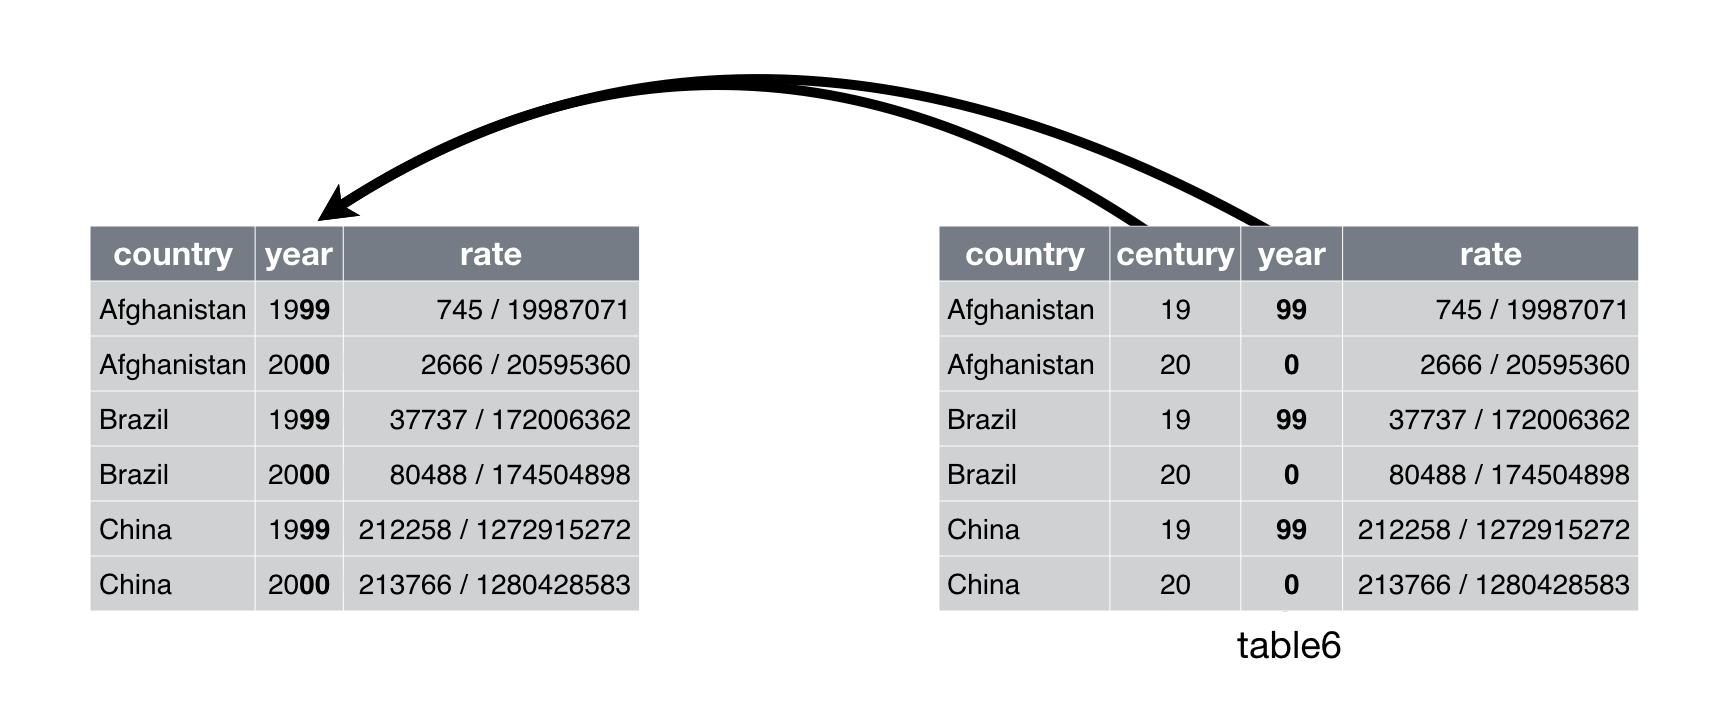